# Analysis of Antibiotics Prescription and Hospitalisation Risk

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
import gzip
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [20]:
#os.chdir("..")
current_working_dir = os.getcwd()
print(current_working_dir)

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\analysis


In [21]:
data = pd.read_csv(r'../output/measures/input_2019-01-01.csv.gz', compression='gzip')
#data = pd.read_csv(r'../output/measures/measure_antibiotics_overall_2019-01-01.csv')
data.head(5)

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,antibacterial_prescriptions_date,sgss_positive,covrx1_dat,covrx2_dat,died_date,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
0,2020-12,2021-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,0,0,3,0,6,0,0,0,5511
1,2021-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,4,0,0,0,0,0,0,0,1306
2,2021-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,4980
3,2021-04,NaN,NaN,2018-12,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,4,3,0,0,0,0,1551
4,2019-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,0,3,0,0,0,0,0,0,3483


In [4]:
#read csv.gz files and concatenate them
#path2 = os.getcwd()+'\output\measures'
##path1 = r'C:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\output\measures'
##all_files = glob.glob(os.path.join(path1, "*.csv.gz"))
##print(path1)

##data = pd.concat((pd.read_csv(f) for f in all_files))
##data

In [22]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'antibacterial_prescriptions_date',
       'sgss_positive', 'covrx1_dat', 'covrx2_dat', 'died_date', 'uti_date_1',
       'uti_date_2', 'uti_date_3', 'uti_date_4', 'lrti_date_1', 'lrti_date_2',
       'lrti_date_3', 'lrti_date_4', 'age', 'age_cat', 'sex', 'practice',
       'region', 'msoa', 'imd', 'bmi', 'ethnicity', 'smoking_status',
       'gp_count', 'flu_vaccine_tpp', 'flu_vaccine',
       'antibacterial_prescriptions',
       'broad_spectrum_antibiotics_prescriptions', 'primary_care_covid',
       'admitted', 'uti_counts', 'lrti_counts', 'uti_ab_count_1',
       'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4', 'lrti_ab_count_1',
       'lrti_ab_count_2', 'lrti_ab_count_3', 'lrti_ab_count_4', 'patient_id'],
      dtype='object')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bmi_date_measured                         950 non-null    object 
 1   smoking_status_date                       100 non-null    object 
 2   most_recent_unclear_smoking_cat_date      100 non-null    object 
 3   flu_vaccine_med                           100 non-null    object 
 4   flu_vaccine_clinical                      100 non-null    object 
 5   antibacterial_prescriptions_date          20 non-null     object 
 6   sgss_positive                             100 non-null    object 
 7   covrx1_dat                                0 non-null      float64
 8   covrx2_dat                                0 non-null      float64
 9   died_date                                 100 non-null    object 
 10  uti_date_1                           

In [24]:
data.describe(include='all')

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,antibacterial_prescriptions_date,sgss_positive,covrx1_dat,covrx2_dat,died_date,...,lrti_counts,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id
count,950,100,100,100,100,20,100,0.0,0.0,100,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,35,32,35,12,6,14,95,NaN,NaN,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-10,2020-04,2020-01,2018-06,2018-08,2019-01-23,2019-12-23,NaN,NaN,2021-08-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,38,6,6,12,21,4,2,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.927000,0.881000,0.885000,0.907000,0.919000,0.901000,0.908000,0.891000,0.891000,4911.451000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.912938,1.812215,1.826228,1.872393,1.907374,1.865121,1.884433,1.850552,1.839158,2909.141374
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2362.750000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4819.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7437.500000


## How would we exclude died persons? Those who died before today? 

In [25]:
data.died_date.value_counts()#.isna().sum()
#index_date


2021-08-11    3
2021-10-30    3
2021-10-23    2
2021-11-05    2
2021-10-14    2
             ..
2021-07-11    1
2021-05-15    1
2021-10-06    1
2020-11-05    1
2021-04-09    1
Name: died_date, Length: 83, dtype: int64

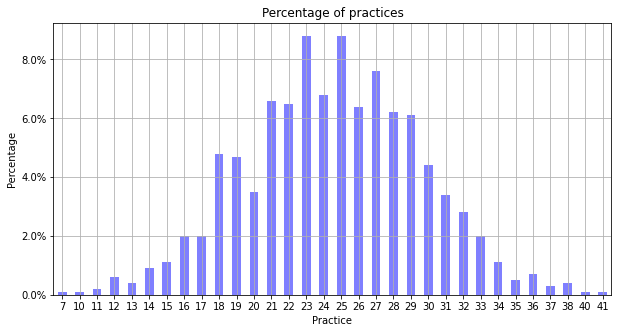

In [27]:
ax = data['practice'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(10, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('Practice')
plt.ylabel('Percentage')
plt.title('Percentage of practices')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.xlim(0, 100)
#plt.ylim(0, 1)
plt.grid()
plt.savefig(r'../output/hospitalisation_risk/practices.png', edgecolor='none')
plt.show()

F    506
M    494
Name: sex, dtype: int64


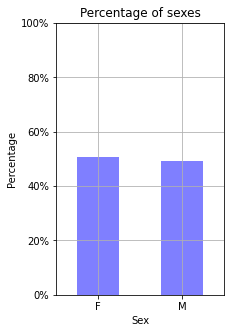

In [10]:
data['sex'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(3, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of sexes')
#plt.xlim(0, 100)
plt.ylim(0, 1)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid()
print(data['sex'].value_counts().sort_index())
plt.savefig(r'../output/hospitalisation_risk/sexes.png', edgecolor='none')
plt.show()

## What do we do with patients that have an age of zero?

C:\Users\m84300af\AppData\Local\Temp/ipykernel_4032/2065139862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][data['age'] < 0] = np.nan


Statistics of age: max=94, mean=40.052, min=0


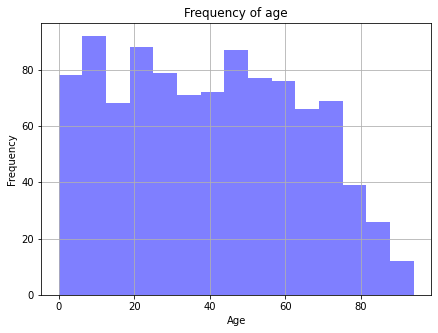

In [48]:
data['age'][data['age'] < 0] = np.nan

data['age'].plot(kind='hist', bins=15, figsize=(7, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency of age')
#plt.xlim(-10, 100)
#plt.ylim(0, 120)
plt.grid()
#ax.set_facecolor("white")
#ax.set_clip_on(False)
#print(data['age_cat'].value_counts().sort_index())
print("Statistics of age: max={max}, mean={mean}, min={min}".format(max = data['age'].max(), mean = data['age'].mean(), min = data['age'].min()))
plt.savefig(r'../output/hospitalisation_risk/age.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


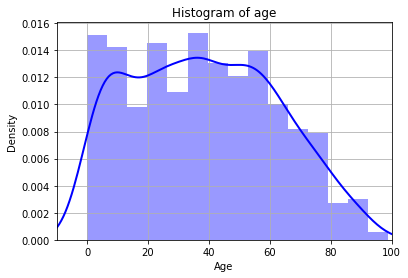

In [13]:
sns.distplot(data['age'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             #hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('Age')
#plt.ylabel('Frequency')
plt.title('Histogram of age')
plt.xlim(-10, 100)
#plt.ylim(0, 1100)
plt.grid(True)
#plt.savefig(r'../output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
plt.show()

In [28]:
# fig_dims = (10, 5)
# fig, ax = plt.subplots(figsize=fig_dims)
# sns.histplot(data = data, x = "age", hue="sex", ax = ax, multiple="dodge", shrink=.8, stat = "percent", edgecolor='none', linewidth=1, bins=15, #alpha=0.7
# )
# plt.gca().yaxis.set_major_formatter(PercentFormatter())
# plt.xlabel('Age')
# #plt.ylabel('Frequency')
# plt.title('Percentage of age')
# #plt.xlim(-10, 100)
# #plt.ylim(0, 1100)
# plt.grid(True)
# #plt.savefig(r'../output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
# plt.show()

0-4      120
15-24    116
25-34    115
35-44    105
45-54     89
5-14     121
55-64    122
65-74    107
75+      105
Name: age_cat, dtype: int64


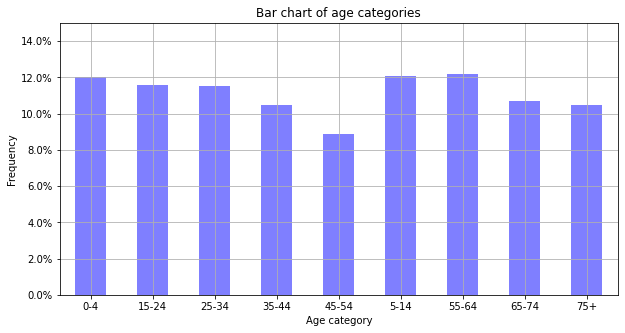

In [17]:
#data['age_cat'].value_counts().sort_index()

data['age_cat'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(10, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('Age category')
plt.ylabel('Percentage')
plt.title('Percentage of age categories')
#plt.xlim(0, 100)
plt.ylim(0, 0.15)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid()
print(data['age_cat'].value_counts().sort_index())
plt.savefig(r'../output/hospitalisation_risk/age_categories.png', edgecolor='none')
plt.show()

0    516
1     74
2    170
3    157
4     74
5      9
Name: antibacterial_prescriptions, dtype: int64


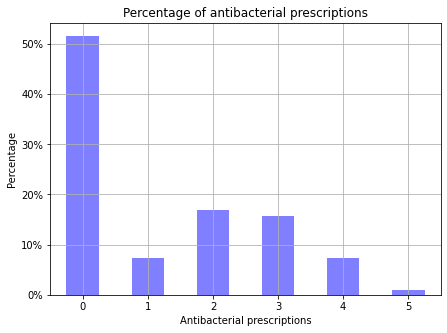

In [19]:
#data['antibacterial_prescriptions'].value_counts().sort_index()

data['antibacterial_prescriptions'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(7, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('Antibacterial prescriptions')
plt.ylabel('Percentage')
plt.title('Percentage of antibacterial prescriptions')
#plt.xlim(0, 100)
#plt.ylim(0, 150)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid()
print(data['antibacterial_prescriptions'].value_counts().sort_index())
plt.savefig(r'../output/hospitalisation_risk/antibacterial_prescriptions.png', edgecolor='none')
plt.show()

In [34]:
data['bmi']

0      23.589980
1      37.814727
2      48.624664
3      36.356491
4      31.094530
         ...    
995    46.475031
996     0.000000
997    30.214430
998    27.008483
999    26.850978
Name: bmi, Length: 1000, dtype: float64

C:\Users\m84300af\AppData\Local\Temp/ipykernel_7528/2406288490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bmi'][data['bmi'] == 0] = np.nan


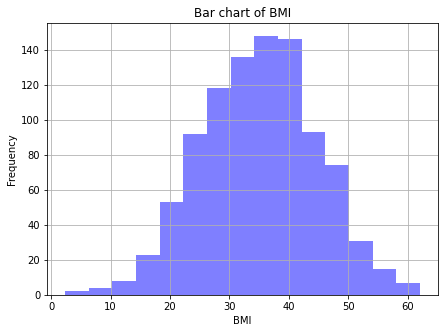

In [38]:
data['bmi'][data['bmi'] == 0] = np.nan

data['bmi'].plot(kind='hist', bins=15, figsize=(7, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Bar chart of BMI')
#plt.xlim(-0, 100)
#plt.ylim(0, 100)
plt.grid()
#print(data['age_cat'].value_counts().sort_index())
plt.savefig(r'../output/hospitalisation_risk/BMI.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


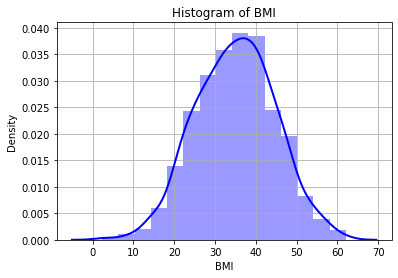

In [40]:
sns.distplot(data['bmi'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             #hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('BMI')
#plt.ylabel('Frequency')
plt.title('Histogram of BMI')
#plt.xlim(-10, 100)
#plt.ylim(0, 1100)
plt.grid(True)
#plt.savefig(r'../output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Temp/ipykernel_7528/3477878770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gp_count'][data['gp_count'] < 0] = np.nan


0.0     424
1.0      29
2.0      49
3.0      62
4.0      69
5.0      73
6.0      71
7.0      54
8.0      46
9.0      58
10.0     24
11.0     14
12.0      8
13.0      7
14.0      2
Name: gp_count, dtype: int64


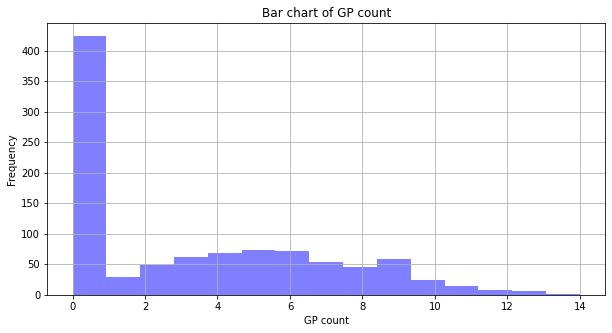

In [45]:
data['gp_count'][data['gp_count'] < 0] = np.nan

data['gp_count'].plot(kind='hist', bins=15, figsize=(10, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('GP count')
plt.ylabel('Frequency')
plt.title('Bar chart of GP count')
#plt.xlim(0, 100)
#plt.ylim(0, 150)
plt.grid()
print(data['gp_count'].value_counts().sort_index())
plt.savefig(r'../output/hospitalisation_risk/gp_count.png', edgecolor='none')
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


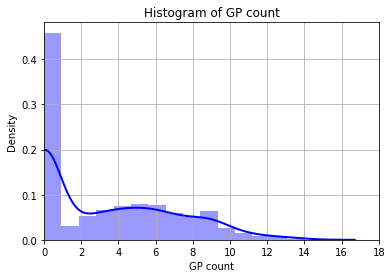

In [50]:
sns.distplot(data['gp_count'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             #hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('GP count')
#plt.ylabel('Frequency')
plt.title('Count of GP consultations')
plt.xlim(0, 18)
#plt.ylim(0, 1100)
plt.grid(True)
#plt.savefig(r'../output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
plt.show()

In [ ]:
data['region'].value_counts()

London                      207
South East                  120
Yorkshire and The Humber    104
North East                  103
North West                  103
South West                  102
West Midlands                92
East Midlands                86
East                         83
Name: region, dtype: int64


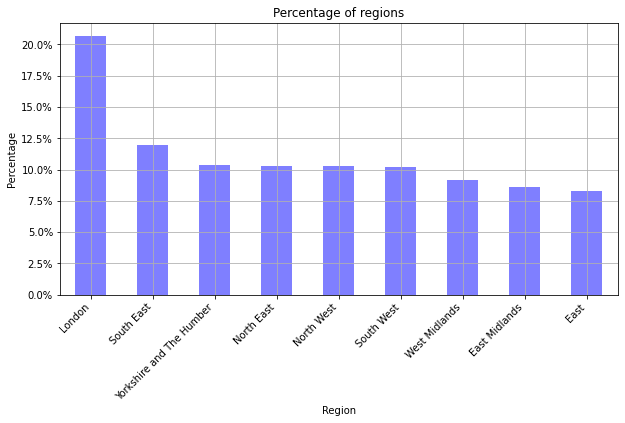

In [20]:
data['region'].value_counts(np.nan).plot(kind='bar', figsize=(10, 5), rot=45, color = 'blue', alpha=0.5)
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.title('Percentage of regions')
plt.xticks(rotation = 45, ha="right")
#plt.xlim(0, 100)
#plt.ylim(0, 150)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.grid()
print(data['region'].value_counts())#.sort_index())
plt.savefig(r'../output/hospitalisation_risk/region.png', edgecolor='none')
plt.show()

In [64]:
data['smoking_status'].value_counts()

S    59
N    24
E    10
M     7
Name: smoking_status, dtype: int64

In [66]:
data['smoking_status'].isna().sum()

900

S    52
N    26
E    14
M     8
Name: smoking_status, dtype: int64
Number of missing values: 900


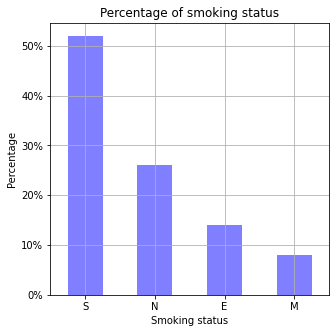

In [22]:
data['smoking_status'].value_counts().plot(kind='bar', figsize=(5, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('Smoking status')
plt.ylabel('Percentage')
plt.title('Percentage of smoking status')
#plt.xlim(0, 100)
#plt.ylim(0, 150)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.grid()
print(data['smoking_status'].value_counts())#.sort_index())
print("Number of missing values: {NaN}".format(NaN = data['smoking_status'].isna().sum()))
plt.savefig(r'../output/hospitalisation_risk/smoking_status.png', edgecolor='none')
plt.show()

0    900
1    100
Name: flu_vaccine, dtype: int64


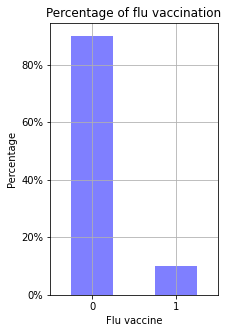

In [42]:
data['flu_vaccine'].value_counts().plot(kind='bar', figsize=(3, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('Flu vaccine')
plt.ylabel('Percentage')
plt.title('Percentage of flu vaccination')
#plt.xlim(0, 100)
#plt.ylim(0, 1000)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1000))
plt.grid()
print(data['flu_vaccine'].value_counts().sort_index())
plt.savefig(r'../output/hospitalisation_risk/flu_vaccine.png', edgecolor='none')
plt.show()

5    207
3    190
1    190
4    189
2    184
0     40
Name: imd, dtype: int64
Number of missing values: 0


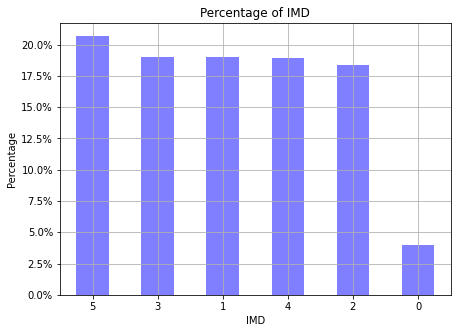

In [53]:
data['imd'].value_counts().plot(kind='bar', figsize=(7, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('IMD')
plt.ylabel('Percentage')
plt.title('Percentage of IMD')
#plt.xlim(0, 100)
#plt.ylim(0, 150)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1000))
plt.grid()
print(data['imd'].value_counts())#.sort_index())
print("Number of missing values: {NaN}".format(NaN = data['imd'].isna().sum()))
plt.savefig(r'../output/hospitalisation_risk/imd.png', edgecolor='none')
plt.show()

In [40]:
data['ethnicity'].value_counts()

1.0    597
5.0     83
3.0     70
Name: ethnicity, dtype: int64

1.0    595
3.0     84
5.0     71
Name: ethnicity, dtype: int64
Number of missing values: 250


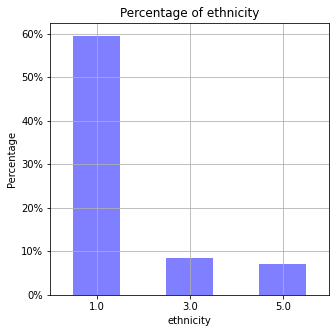

In [55]:
data['ethnicity'].value_counts().sort_index().plot(kind='bar', figsize=(5, 5), rot=0, color = 'blue', alpha=0.5)
plt.xlabel('ethnicity')
plt.ylabel('Percentage')
plt.title('Percentage of ethnicity')
#plt.xlim(0, 100)
#plt.ylim(0, 150)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1000))
plt.grid()
print(data['ethnicity'].value_counts())#.sort_index())
print("Number of missing values: {NaN}".format(NaN = data['ethnicity'].isna().sum()))
plt.savefig(r'../output/hospitalisation_risk/ethnicity.png', edgecolor='none')
plt.show()

In [38]:
data.sgss_positive.value_counts()

2019-08-06    2
2019-05-27    2
2019-11-21    2
2021-03-18    2
2020-06-27    2
             ..
2021-01-28    1
2020-05-18    1
2020-02-11    1
2019-10-16    1
2019-01-29    1
Name: sgss_positive, Length: 95, dtype: int64

In [33]:
data.admitted

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
995           NaN
996    2020-01-11
997    2020-04-16
998           NaN
999           NaN
Name: admitted, Length: 1000, dtype: object

In [34]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'sgss_positive', 'covrx1_dat', 'covrx2_dat',
       'admitted', 'died_date', 'uti_date_1', 'uti_date_2', 'uti_date_3',
       'uti_date_4', 'lrti_date_1', 'lrti_date_2', 'lrti_date_3',
       'lrti_date_4', 'age', 'age_cat', 'sex', 'practice', 'region', 'msoa',
       'imd', 'bmi', 'ethnicity', 'smoking_status', 'gp_count',
       'flu_vaccine_tpp', 'flu_vaccine', 'antibacterial_prescriptions',
       'broad_spectrum_antibiotics_prescriptions', 'primary_care_covid',
       'uti_counts', 'lrti_counts', 'uti_ab_count_1', 'uti_ab_count_2',
       'uti_ab_count_3', 'uti_ab_count_4', 'lrti_ab_count_1',
       'lrti_ab_count_2', 'lrti_ab_count_3', 'lrti_ab_count_4', 'patient_id'],
      dtype='object')

## Negative GP consultations mean what? Shall I remove them?

In [35]:
data['gp_count'].value_counts()

 0     424
 5      94
 6      89
 7      83
 3      53
 8      51
 4      46
 2      39
 9      37
 1      28
 10     24
 11     15
 12     10
-3       2
 13      2
-1       2
-4       1
Name: gp_count, dtype: int64

(0.0, 100.0)

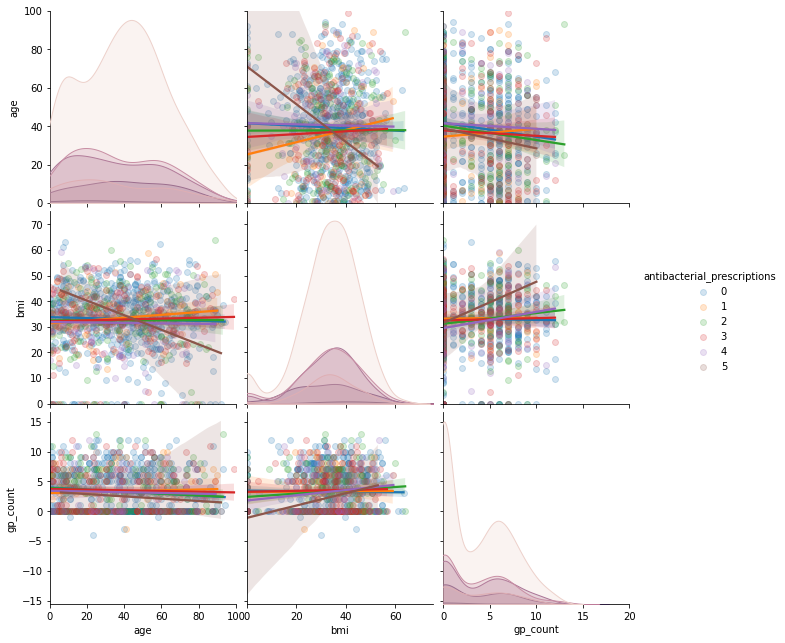

In [36]:
p = sns.pairplot(data, vars=['age', 'bmi', 'gp_count'#, 'practice'
                             ], hue = 'antibacterial_prescriptions', kind='reg', #markers=["o", "s"], 
                 diag_kind="kde"#"hist"
                 , plot_kws={#'line_kws':{'color':'red'}, 
                 'scatter_kws': {'alpha': 0.2}}, 
                 height = 3)

p.axes[0,2].set_xlim((0,20))
p.axes[0,2].set_ylim((0,100))

p.axes[1,1].set_xlim((0,75))
p.axes[1,1].set_ylim((0,75))

p.axes[2,0].set_xlim((0,100))
#p.axes[2,0].set_ylim((0,20))

(0.0, 20.0)

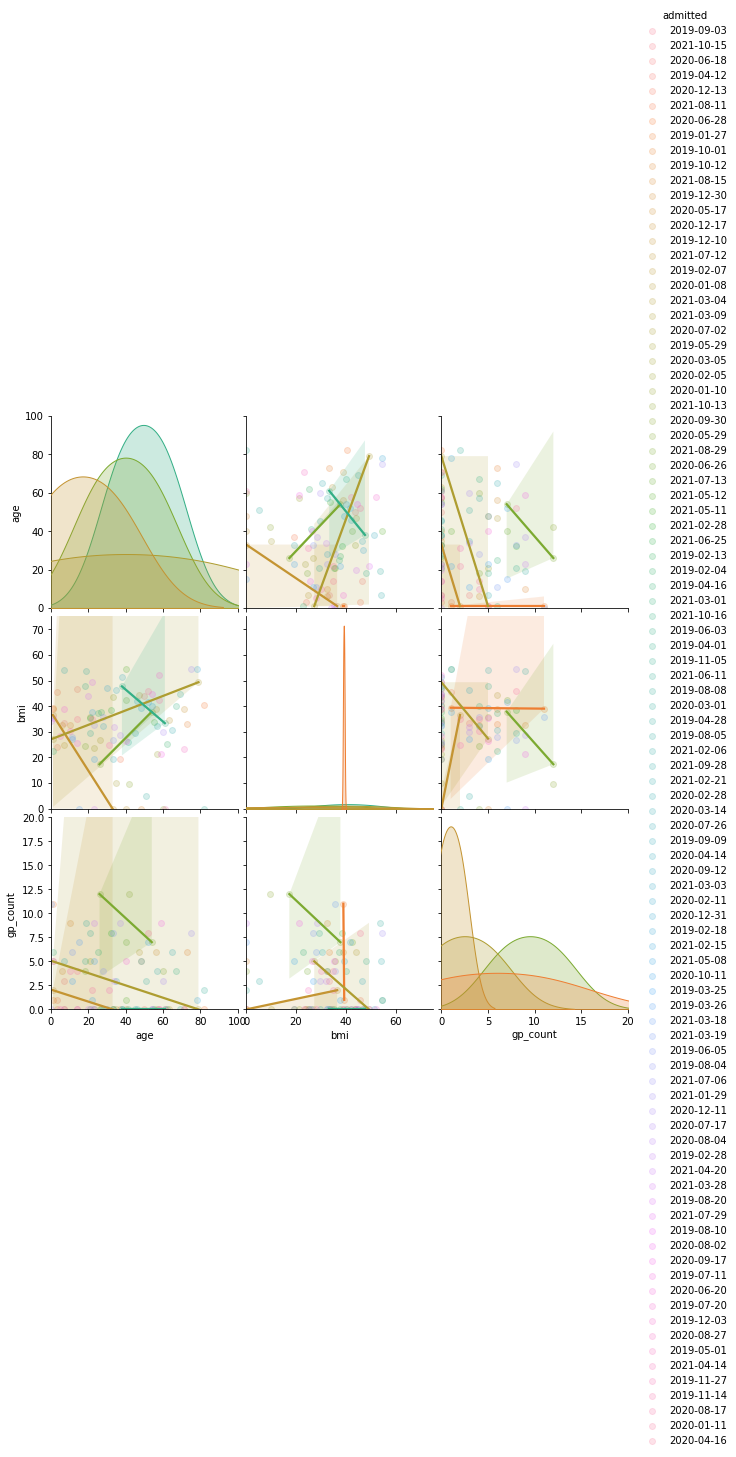

In [37]:
p = sns.pairplot(data, vars=['age', 'bmi', 'gp_count'#, 'practice'
                             ], hue = 'admitted', kind='reg', #markers=["o", "s"], 
                 diag_kind="kde"#"hist"
                 , plot_kws={#'line_kws':{'color':'red'}, 
                 'scatter_kws': {'alpha': 0.2}}, height = 3)

p.axes[0,2].set_xlim((0,20))
p.axes[0,2].set_ylim((0,100))

p.axes[1,1].set_xlim((0,75))
p.axes[1,1].set_ylim((0,75))

p.axes[2,0].set_xlim((0,100))
p.axes[2,0].set_ylim((0,20))